In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pydub import AudioSegment
import pandas as pd
import IPython.display as ipd

In [3]:
FOLDER = '/home/usuario/birds/birdsong-recognition/'
TRAIN_FOLDER = FOLDER + 'train_audio/'

train = pd.read_csv(FOLDER+'train.csv')

In [4]:
def get_spectrum(x):
    X = librosa.stft(x, )
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    return Xdb

In [5]:
birds_codes = train['ebird_code'].unique()
print(birds_codes[:100])

['aldfly' 'ameavo' 'amebit' 'amecro' 'amegfi' 'amekes' 'amepip' 'amered'
 'amerob' 'amewig' 'amewoo' 'amtspa' 'annhum' 'astfly' 'baisan' 'baleag'
 'balori' 'banswa' 'barswa' 'bawwar' 'belkin1' 'belspa2' 'bewwre' 'bkbcuc'
 'bkbmag1' 'bkbwar' 'bkcchi' 'bkchum' 'bkhgro' 'bkpwar' 'bktspa' 'blkpho'
 'blugrb1' 'blujay' 'bnhcow' 'boboli' 'bongul' 'brdowl' 'brebla' 'brespa'
 'brncre' 'brnthr' 'brthum' 'brwhaw' 'btbwar' 'btnwar' 'btywar' 'buffle'
 'buggna' 'buhvir' 'bulori' 'bushti' 'buwtea' 'buwwar' 'cacwre' 'calgul'
 'calqua' 'camwar' 'cangoo' 'canwar' 'canwre' 'carwre' 'casfin' 'caster1'
 'casvir' 'cedwax' 'chispa' 'chiswi' 'chswar' 'chukar' 'clanut' 'cliswa'
 'comgol' 'comgra' 'comloo' 'commer' 'comnig' 'comrav' 'comred' 'comter'
 'comyel' 'coohaw' 'coshum' 'cowscj1' 'daejun' 'doccor' 'dowwoo' 'dusfly'
 'eargre' 'easblu' 'easkin' 'easmea' 'easpho' 'eastow' 'eawpew' 'eucdov'
 'eursta' 'evegro' 'fiespa' 'fiscro']


In [6]:
import os

In [7]:
def get_bird_data(dataset_folder, ebird_code, target_sr = 22050, chunk_seconds=2, rating_thres = 4, std_thres=0.1, save=True):
    under_tres = []
    if not os.path.exists(dataset_folder):
        os.makedirs(dataset_folder)
    total_duration = 0
    df_aldfly = train[train['ebird_code']==ebird_code]
    chunk_size = chunk_seconds*target_sr
    ebird_folder = dataset_folder + ebird_code + '/'
    if not os.path.exists(ebird_folder):
        os.makedirs(ebird_folder)
    for i in range(len(df_aldfly)):
        df_row = df_aldfly.iloc[i]
        rating = df_row['rating']
        if rating>=rating_thres:
            dataframe = df_aldfly.iloc[i]
            x, orig_sr, duration = get_train_clip(dataframe, target_sr)
            print(f'\r{i}, {orig_sr}, {duration}', end='')
            x = x[:(len(x)//chunk_size)*chunk_size].reshape(-1, chunk_size)
            
            total_duration = total_duration + duration
            
            for j, row in enumerate(x):
                row_std = row.std()
                
                if row_std > std_thres:
                    # print(j, row.mean(), row.std())
                    if save:
                        file_to_save = ebird_folder + ''.join(dataframe['filename'].split('.')[:-1]) + f'_{j+1}.npy'
                        if not os.path.exists(file_to_save):
                            np.save(file_to_save, row)

                else:
                    under_tres.append(row)
    return under_tres

In [8]:
from matplotlib import pyplot as plt
import numpy as np
from birds_utils import save_class_dataset

In [22]:
target_sr = 22050
chunk_seconds = 5
hop_seconds = 0.25
std_thres = 1
classes = ['amegfi', 'amecro', 'aldfly']
dataset_folder = './dataset/all/'
for cl in classes:
    save_class_dataset(train, dataset_folder, cl, target_sr = target_sr, chunk_seconds=chunk_seconds, hop_seconds=hop_seconds, std_thres = std_thres)
    print()
# save_class_dataset(train, './dataset/all/', 'amecro', target_sr = target_sr, chunk_seconds=chunk_seconds, hop_seconds=hop_seconds, std_thres = std_thres)
# print()
# save_class_dataset(train, './dataset/all/', 'aldfly', target_sr = target_sr, chunk_seconds=chunk_seconds, hop_seconds=hop_seconds, std_thres = std_thres)

299 - ./dataset/all/amegfi/XC51411_300_5_0.25.npyypy
1087 - ./dataset/all/amecro/XC51410_1088_5_0.25.npyy
59 - ./dataset/all/aldfly/XC78890_60_5_0.25.npynpypy


In [23]:
from glob import glob
for cl in classes:
    dataset_folder_cl = dataset_folder + cl
    print(len(glob(dataset_folder_cl+'**/*', recursive=True)))
# 17657 para amegfi hop_seconds=0.25
# 4436 para amegfi hop_seconds=1

17657
16891
15387


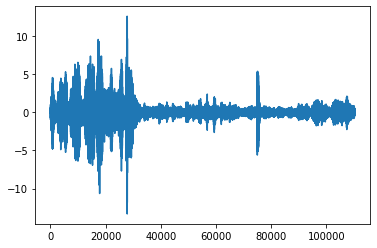

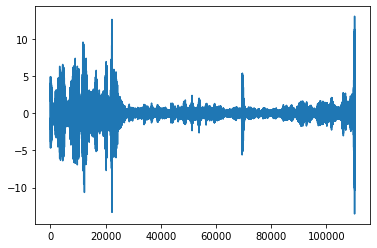

In [24]:
chunk_1 = np.load(f'./dataset/all/aldfly/XC134874_18_{chunk_seconds}_{hop_seconds}.npy')
chunk_2 = np.load(f'./dataset/all/aldfly/XC134874_19_{chunk_seconds}_{hop_seconds}.npy')
plt.plot(chunk_1)
plt.show()
plt.plot(chunk_2)
ipd.Audio(chunk_1, rate=target_sr)

In [25]:
# dataset_folder = './dataset/all/'
# sr = 22050
# chunk_seconds = 2
# rating_thres = 1
# _ = get_bird_data(dataset_folder, 'amecro', target_sr = 22050, chunk_seconds=chunk_seconds, rating_thres = rating_thres)
# _ = get_bird_data(dataset_folder, 'aldfly', target_sr = 22050, chunk_seconds=chunk_seconds, rating_thres = rating_thres)
# _ = get_bird_data(dataset_folder, 'amegfi', target_sr = 22050, chunk_seconds=chunk_seconds, rating_thres = rating_thres)

In [26]:
# stds = [x.std() for x in X_amecro]

In [27]:
# indxs = np.argsort(stds)
# N = 200
# print(indxs[:N])
# print(np.array(stds)[indxs][:N])

In [28]:
# ipd.Audio(X_amecro[1406], rate=sr)

In [29]:
# ((299, 44100), (406, 44100)
# X_ameavo = get_bird_data(dataset_folder, 'ameavo', target_sr = 22050, chunk_seconds=2)
# X_amebit = get_bird_data('amebit', target_sr = 22050, chunk_seconds=2)

In [30]:
from birds_utils import create_train_val_folders, create_train_val_folders_with_diff_files

In [31]:
dataset_folder = './dataset/'
create_train_val_folders_with_diff_files(dataset_folder, ratio=0.2, all_subfolder='all/', train_subfolder='train/', val_subfolder='val/')

./dataset/train/
./dataset/val/
0.3217306684632083
0.30442522889114954
0.2909660654234179


In [32]:
all_subfolder = 'all/'
train_subfolder = 'train/'
val_subfolder = 'val/'

In [33]:
dataset_folder_all = dataset_folder + all_subfolder
dataset_folder_train = dataset_folder + train_subfolder
dataset_folder_val = dataset_folder + val_subfolder

In [34]:
from glob import glob

In [35]:
len(glob(dataset_folder_train+'**/*', recursive=True))

38242

In [36]:
len(glob(dataset_folder_val+'**/*', recursive=True))

11699

In [38]:
len(glob(dataset_folder_all+'**/*', recursive=True))

49938